In [25]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic')  #  'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  #  -기호 사용 가능  #  이부분 안하고 아랫부분하면 한글때문에 깨져서나옴

In [31]:
df = pd.read_csv('./dataset/dataset_final.csv')
df

,air_date,air_hour,air_place,air_pm1,air_pm2,air_Ozone,air_no,air_co,air_so,air_car
0,2022-07-01,1시,강남구,2,13,0.013,0.031,0.3,0.003,7966
1,2022-07-01,1시,강서구,6,19,0.005,0.015,0.3,0.002,4770
2,2022-07-01,1시,관악구,7,18,0.009,0.008,0.3,0.002,1938
3,2022-07-01,1시,광진구,7,13,0.006,0.023,0.4,0.003,2081
4,2022-07-01,1시,구로구,1,9,0.011,0.005,0.2,0.002,1396
...,...,...,...,...,...,...,...,...,...,...
3691,2022-07-07,24시,영등포구,17,31,0.031,0.006,0.3,0.002,12109
3692,2022-07-07,24시,용산구,11,20,0.039,0.006,0.2,0.002,13494
3693,2022-07-07,24시,종로구,14,23,0.039,0.007,0.2,0.003,6025
3694,2022-07-07,24시,중구,13,24,0.035,0.011,0.2,0.003,6464


In [32]:
df['air_place'].value_counts()

강남구     168
강서구     168
중구      168
종로구     168
용산구     168
영등포구    168
양천구     168
송파구     168
성북구     168
성동구     168
서초구     168
서대문구    168
마포구     168
동작구     168
동대문구    168
도봉구     168
노원구     168
금천구     168
구로구     168
광진구     168
관악구     168
중랑구     168
Name: air_place, dtype: int64

# 정규화

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.loc[:,'air_pm1':'air_car'] = scaler.fit_transform(df.loc[:,'air_pm1':'air_car'])
df

,air_date,air_hour,air_place,air_pm1,air_pm2,air_Ozone,air_no,air_co,air_so,air_car
0,2022-07-01,1시,강남구,0.032258,0.171053,0.092199,0.574074,0.333333,0.428571,0.144565
1,2022-07-01,1시,강서구,0.096774,0.250000,0.035461,0.277778,0.333333,0.285714,0.083931
2,2022-07-01,1시,관악구,0.112903,0.236842,0.063830,0.148148,0.333333,0.285714,0.030203
3,2022-07-01,1시,광진구,0.112903,0.171053,0.042553,0.425926,0.444444,0.428571,0.032916
4,2022-07-01,1시,구로구,0.016129,0.118421,0.078014,0.092593,0.222222,0.285714,0.019920
...,...,...,...,...,...,...,...,...,...,...
3691,2022-07-07,24시,영등포구,0.274194,0.407895,0.219858,0.111111,0.333333,0.285714,0.223164
3692,2022-07-07,24시,용산구,0.177419,0.263158,0.276596,0.111111,0.222222,0.285714,0.249440
3693,2022-07-07,24시,종로구,0.225806,0.302632,0.276596,0.129630,0.222222,0.428571,0.107740
3694,2022-07-07,24시,중구,0.209677,0.315789,0.248227,0.203704,0.222222,0.428571,0.116069


# 2022-07-07 자치구 22개의 시간대별 통행량 및 미세먼지 농도 시각화

In [34]:
df2 = df[df['air_date'].str.contains('2022-07-07')]
df2

,air_date,air_hour,air_place,air_pm1,air_pm2,air_Ozone,air_no,air_co,air_so,air_car
3168,2022-07-07,1시,강남구,0.193548,0.263158,0.134752,0.351852,0.333333,0.428571,0.221476
3169,2022-07-07,1시,강서구,0.161290,0.157895,0.113475,0.277778,0.333333,0.285714,0.085297
3170,2022-07-07,1시,관악구,0.161290,0.289474,0.000000,0.240741,0.333333,0.285714,0.034187
3171,2022-07-07,1시,광진구,0.129032,0.210526,0.148936,0.166667,0.333333,0.428571,0.034851
3172,2022-07-07,1시,구로구,0.016129,0.065789,0.127660,0.259259,0.333333,0.285714,0.023032
...,...,...,...,...,...,...,...,...,...,...
3691,2022-07-07,24시,영등포구,0.274194,0.407895,0.219858,0.111111,0.333333,0.285714,0.223164
3692,2022-07-07,24시,용산구,0.177419,0.263158,0.276596,0.111111,0.222222,0.285714,0.249440
3693,2022-07-07,24시,종로구,0.225806,0.302632,0.276596,0.129630,0.222222,0.428571,0.107740
3694,2022-07-07,24시,중구,0.209677,0.315789,0.248227,0.203704,0.222222,0.428571,0.116069


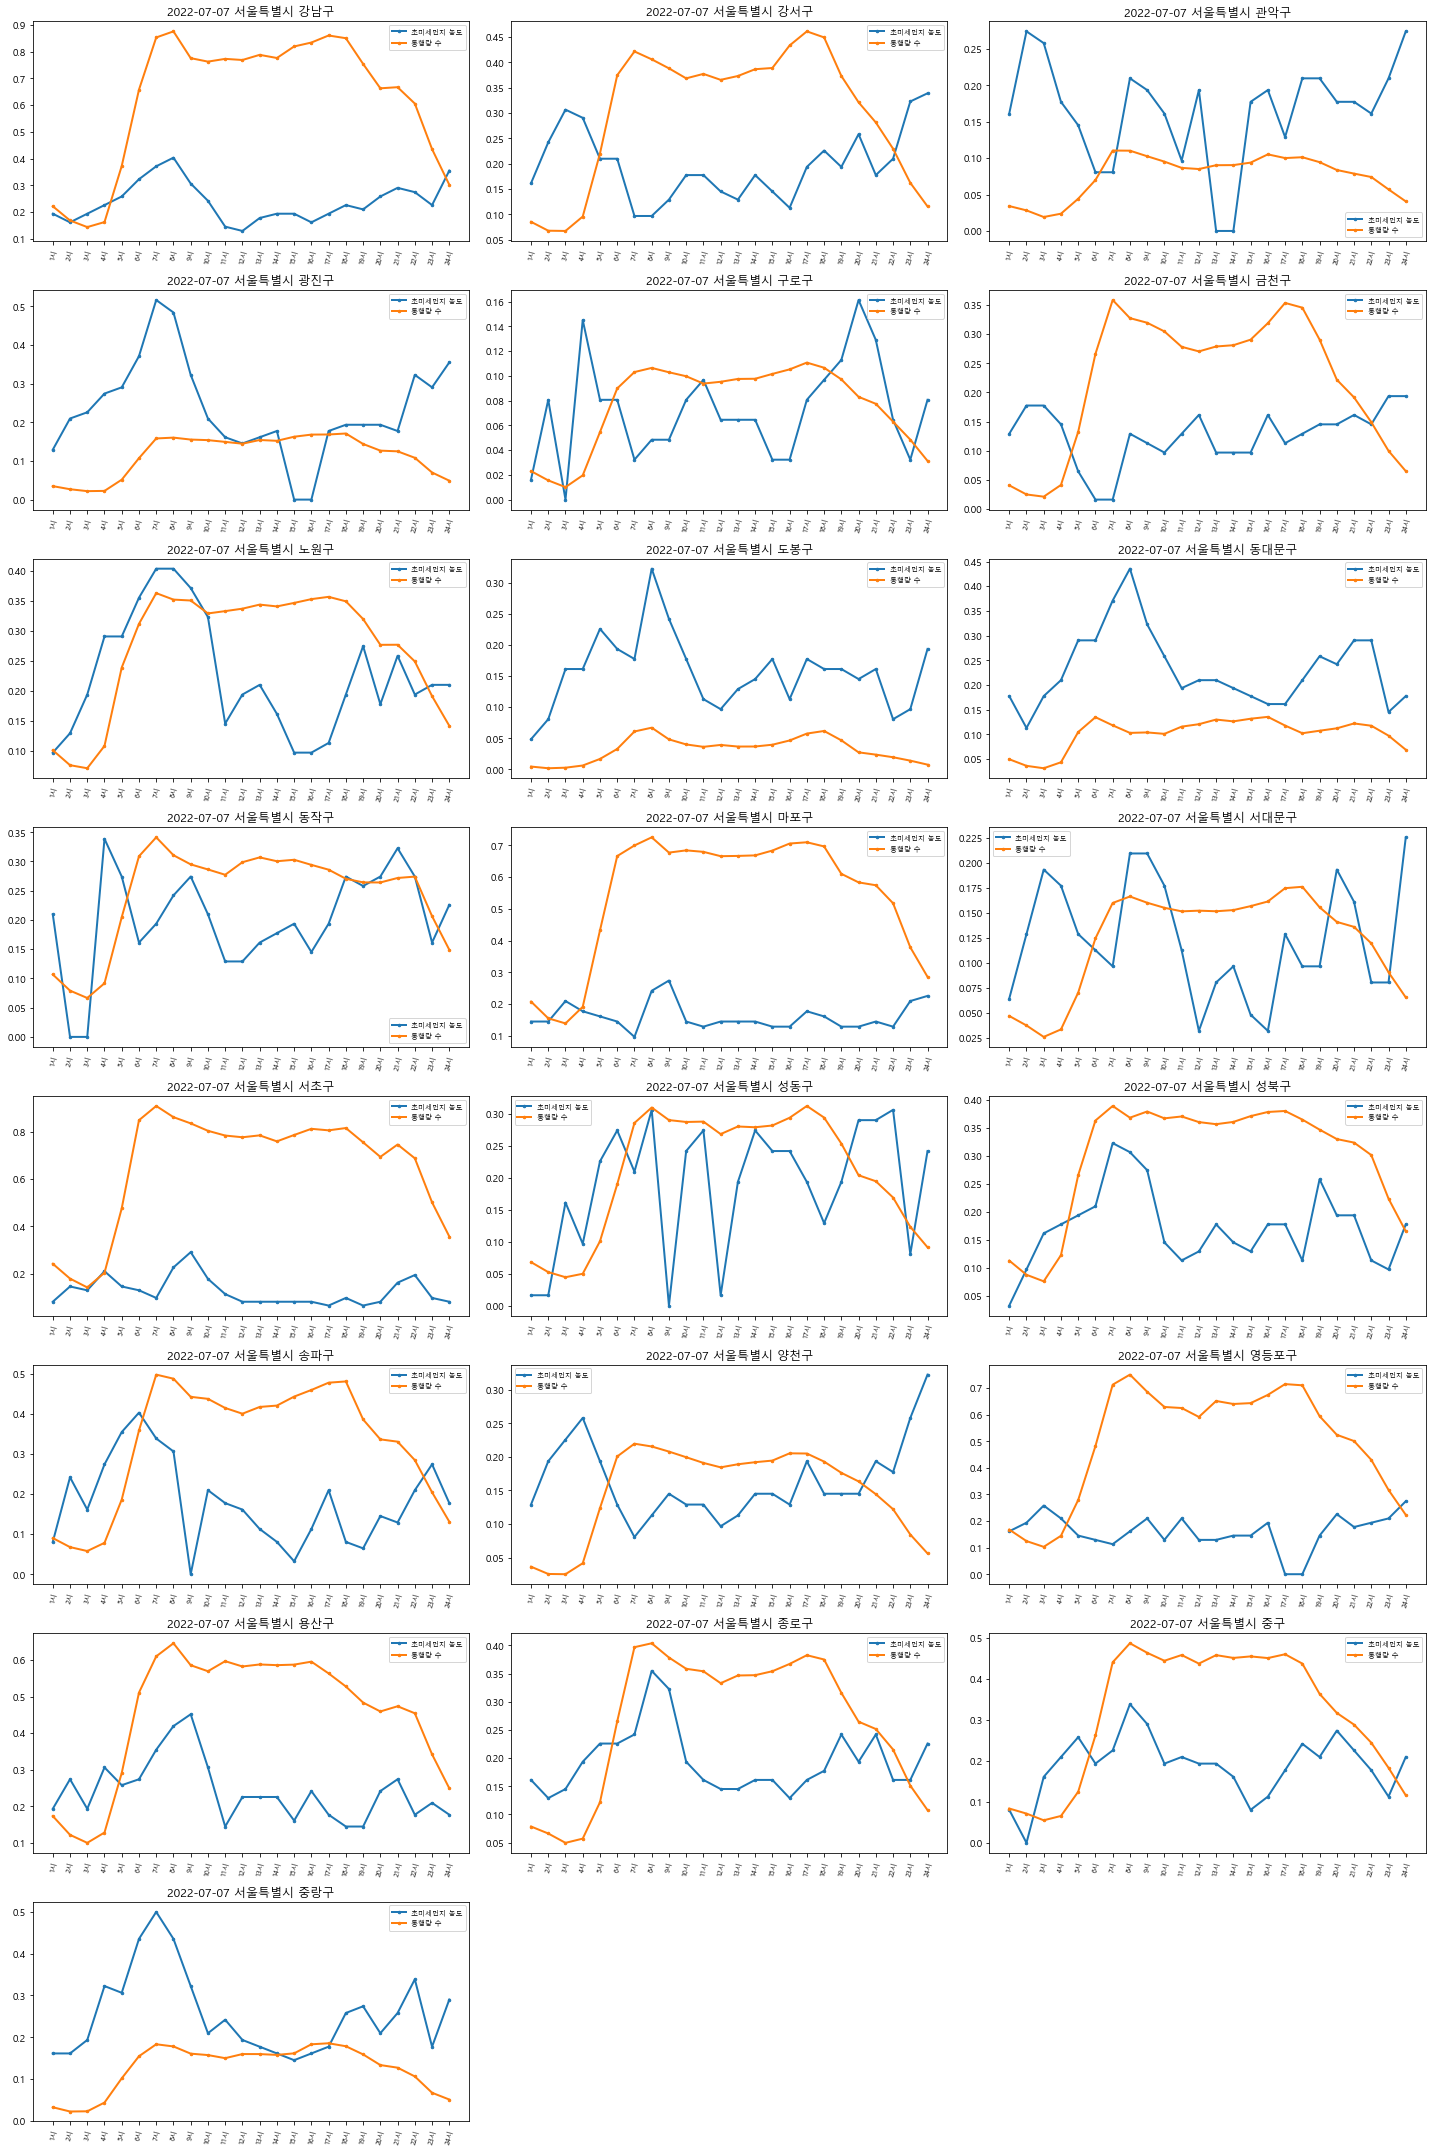

In [41]:
fig = plt.figure(figsize=(20,30))
group_df = df2.groupby(['air_date', 'air_place'])
count = 1
for key, group in group_df:
    test = group[['air_hour','air_pm1','air_car']]
#     print(test)
#     for i in range(0,23)
    plt.subplot(8, 3, count)
#     plt.bar(test['air_hour'], test['air_pm1'], label = '초미세먼지 농도', color = 'green')
    plt.plot(test['air_hour'], test['air_pm1'], label = '초미세먼지 농도', marker = '.', markersize = 5, lw=2)
    plt.plot(test['air_hour'], test['air_car'], label = '통행량 수', marker = '.', markersize = 5, lw=2)
    count += 1
    
    plt.legend(loc='best', fontsize=7)
    plt.title(f'{group.iloc[0,0]} 서울특별시 {group.iloc[0,2]}', size=12)
    
    plt.xticks(rotation=75, size=7)

plt.tight_layout()
plt.show()        

In [37]:
df.corr()

,air_pm1,air_pm2,air_Ozone,air_no,air_co,air_so,air_car
air_pm1,1.000000,0.824717,0.476559,0.293761,0.214349,0.256614,0.078502
air_pm2,0.824717,1.000000,0.450145,0.311827,0.265405,0.287315,0.037578
air_Ozone,0.476559,0.450145,1.000000,-0.164298,-0.067753,0.172430,0.228614
air_no,0.293761,0.311827,-0.164298,1.000000,0.518808,0.217284,0.189168
air_co,0.214349,0.265405,-0.067753,0.518808,1.000000,0.052161,-0.075669
air_so,0.256614,0.287315,0.172430,0.217284,0.052161,1.000000,0.137769
air_car,0.078502,0.037578,0.228614,0.189168,-0.075669,0.137769,1.000000


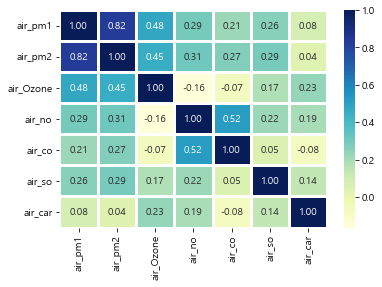

In [36]:
# 히트맵을 통한 상관관계 시각화
sns.heatmap(df.corr(),  # 데이터
            annot = True, fmt='.2f',  # 데이터 값 표시 여부, 정수형
           cmap = 'YlGnBu',   # 컬러 맵의 종류
           linewidth =2.5, 
           cbar = True)
plt.show()